# **Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

# **Loading Data**

In [2]:
df = pd.read_csv('/content/sample_data/heart.csv')

# Displaying first 5 columns and rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Display last 5 rows

df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# **Exploratory Data Ananlysis**

In [4]:
# Checking how many columns and rows are there in the dataframe

df.shape

(303, 14)

In [5]:
# Checking total entries in the dataframe

df.size

4242

In [6]:
# Getting info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Checking for any null values

df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [8]:
# Checking the dataypes of the data

df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


# **Graphical representation of relationship between Age & Sex relative to heart disease**

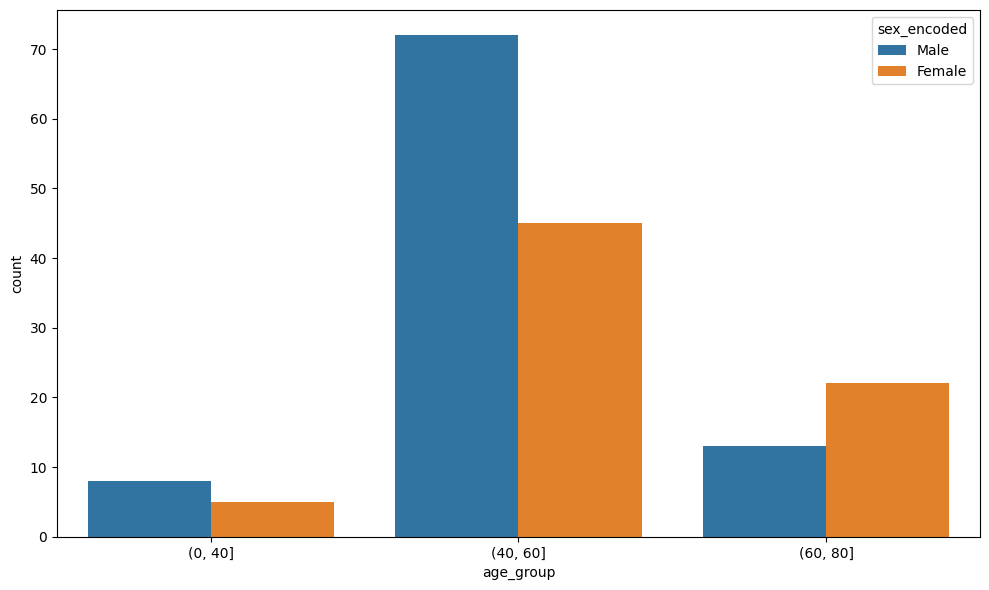

In [40]:
plt.figure(figsize=(10, 6))

df['sex_encoded'] = df['sex'].map({0 : 'Female', 1 : 'Male'})
df['age_group'] = pd.cut(df['age'], bins=[0, 40, 60, 80])
sns.countplot(x='age_group', hue='sex_encoded', data=df[df['target'] == 1])

plt.tight_layout()
plt.show()

In [9]:
# Checking for duplicated values in the dataframe

df.duplicated().sum()

np.int64(1)

In [10]:
# Getting the statistical data

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
# Cheking the distribution of target

df['target'].value_counts()

,count
target,
1,165
0,138


# **Pre-Processing**

In [12]:
# Splitting data into target and features

X = df.drop('target', axis=1)
Y = df['target']

In [13]:
# Checking if the feature required standardization

X.mean()

# This should give values 0

,0
age,54.366337
sex,0.683168
cp,0.966997
trestbps,131.623762
chol,246.264026
fbs,0.148515
restecg,0.528053
thalach,149.646865
exang,0.326733
oldpeak,1.039604


In [14]:
X.std()

# This should give values 1

,0
age,9.082101
sex,0.466011
cp,1.032052
trestbps,17.538143
chol,51.830751
fbs,0.356198
restecg,0.525860
thalach,22.905161
exang,0.469794
oldpeak,1.161075


In [15]:
# Rquires standardization

In [16]:
# Standardizing the data

scaler  = StandardScaler()

X_scale = scaler.fit_transform(X)

In [17]:
# Checking the mean and standard deviation after scalling

X_scale.mean()

# Close to 0

np.float64(-1.407015318336832e-16)

In [18]:
X_scale.std()

# Close to 1

np.float64(0.9999999999999999)

In [19]:
# Splitting the dataset for training and testing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y ,random_state=42)

# **Model Training**

In [20]:
model = LogisticRegression()

In [21]:
lr_fit = model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Evaluating the Model using unknown data**

In [22]:
y_pred_test = model.predict(X_test)

# **Evaluating the Model using training data**

In [23]:
y_pred_train = model.predict(X_train)

# **Accuracy of model on both training and testing data**

In [24]:
acc_test = accuracy_score(y_pred_test, Y_test)
acc_train = accuracy_score(y_pred_train, Y_train)

print(f"Accuracy of the model on testing data { acc_test * 100} and training data {acc_train * 100}")

Accuracy of the model on testing data 80.32786885245902 and training data 84.29752066115702


# **Visualizing the accuracy using confusion matrix**

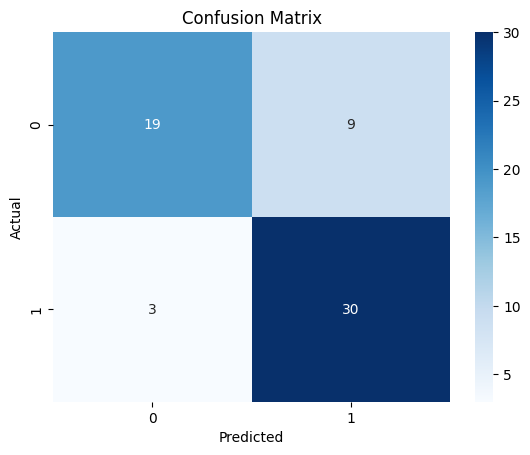

In [25]:
conf = confusion_matrix(Y_test, y_pred_test)

sns.heatmap(data=conf, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Building a predictive system**

In [26]:
input_data =  [57	,0	,0	,140	,241	,0	,1	,123	,1	,0.2	,1	,0	,3]  #[63,1,3,145,233,1,0	,150, 0	,2.3	,0	,0	,1	]

input_np_arr = np.array(input_data)


input_data = input_np_arr.reshape(1,-1)

model_result = model.predict(input_data)[0]

if model_result == 1:
  print("This patient has heart problem")
else:
  print("This pratient is healthy")

This pratient is healthy


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **Saving the model**

In [27]:
import pickle

file_name = 'trained_model.sav'

pickle.dump((lr_fit, X_scale), open(file_name, 'wb'))

In [28]:
# Load the saved model

load_model = pickle.load(open('trained_model.sav', 'rb'))

lr_model, std = load_model


# **Testing the saved model**

In [29]:
#[57	,0	,0	,140	,241	,0	,1	,123	,1	,0.2	,1	,0	,3]

input_data = [63,1,3,145,233,1,0	,150, 0	,2.3	,0	,0	,1	]

input_np_arr = np.array(input_data)

input_data = input_np_arr.reshape(1,-1)

model_result = lr_model.predict(input_data)[0]

if model_result == 1:
  print("This patient has heart problem")
else:
  print("This pratient is healthy")

This patient has heart problem


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
